In [8]:
import lir
import pickle
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

In [3]:
lr_ss1 = pickle.load(open('lr_ss_SCFace_distance1.pkl','rb'))
lr_ds1 = pickle.load(open('lr_ds_SCFace_distance1.pkl','rb'))
lr_ss2 = pickle.load(open('lr_ss_SCFace_distance2.pkl','rb'))
lr_ds2 = pickle.load(open('lr_ds_SCFace_distance2.pkl','rb'))
lr_ss3 = pickle.load(open('lr_ss_SCFace_distance3.pkl','rb'))
lr_ds3 = pickle.load(open('lr_ds_SCFace_distance3.pkl','rb'))

lrs1, y1 = lir.util.Xn_to_Xy(lr_ds1,lr_ss1)
lrs2, y2 = lir.util.Xn_to_Xy(lr_ds2,lr_ss2)
lrs3, y3 = lir.util.Xn_to_Xy(lr_ds3,lr_ss3)

len(lrs1), len(lrs2), len(lrs3)

(144996, 163830, 166410)

In [4]:
lir.calculate_lr_statistics(lr_ds3,lr_ss3)

LrStats(avg_llr=33.86070374865159, avg_llr_class0=25.683155314657743, avg_llr_class1=42.03825218264543, avg_p0_class0=None, avg_p1_class0=None, avg_p0_class1=None, avg_p1_class1=None, cllr_class0=0.0037966890607975374, cllr_class1=0.016901233327541034, cllr=0.010348961194169285, lr_class0=array([2.85304519e-08, 8.36909457e-09, 6.91942108e-07, ...,
       1.89671501e-07, 8.27863002e-09, 2.44171790e-10]), lr_class1=array([8.28371681e+15, 1.22205625e+14, 1.54795831e+13, ...,
       4.89706766e+14, 7.58791122e+12, 6.00980141e+13]), cllr_min=0.005377653986259567, cllr_cal=0.004971307207909718)

In [5]:
#compute data for ECE plots

log_prior_odds_range = (-3, 3)

log_prior_odds = np.arange(*log_prior_odds_range, .01)
prior_odds = np.power(10, log_prior_odds)
prob_prior_odds = lir.util.to_probability(prior_odds)

#reference
ece_ref = lir.calculate_ece(np.ones(len(lrs1)), y1, prob_prior_odds)

#ece 1, 2 and 3
ece1 = lir.calculate_ece(lrs1, y1, prob_prior_odds)
ece2 = lir.calculate_ece(lrs2, y2, prob_prior_odds)
ece3 = lir.calculate_ece(lrs3, y3, prob_prior_odds)

#pav 1, 2 and 3
pav1 = lir.calibration.IsotonicCalibrator().fit_transform(lir.util.to_probability(lrs1),y1)
pav2 = lir.calibration.IsotonicCalibrator().fit_transform(lir.util.to_probability(lrs2),y2)
pav3 = lir.calibration.IsotonicCalibrator().fit_transform(lir.util.to_probability(lrs3),y3)

#ece after pav 1, 2 and 3
ece_pav1 = lir.calculate_ece(pav1,y1,prob_prior_odds)
ece_pav2 = lir.calculate_ece(pav2,y2,prob_prior_odds)
ece_pav3 = lir.calculate_ece(pav3,y3,prob_prior_odds)

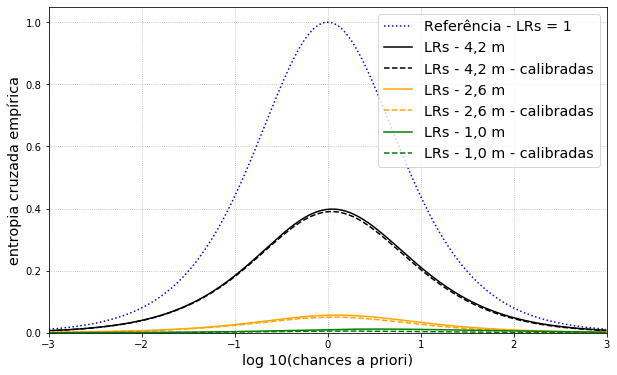

In [9]:
#plot

plt.plot(log_prior_odds,ece_ref,linestyle='dotted', color='blue',label='Referência - LRs = 1')

plt.plot(log_prior_odds,ece1,linestyle='solid', color='black',label='LRs - 4,2 m')
plt.plot(log_prior_odds,ece_pav1,linestyle='dashed', color='black',label='LRs - 4,2 m - calibradas')

plt.plot(log_prior_odds,ece2,linestyle='solid', color='orange',label='LRs - 2,6 m')
plt.plot(log_prior_odds,ece_pav2,linestyle='dashed', color='orange',label='LRs - 2,6 m - calibradas')

plt.plot(log_prior_odds,ece3,linestyle='solid', color='green',label='LRs - 1,0 m')
plt.plot(log_prior_odds,ece_pav3,linestyle='dashed', color='green',label='LRs - 1,0 m - calibradas')

plt.xlabel("log 10(chances a priori)",fontsize='x-large')
plt.ylabel("entropia cruzada empírica",fontsize='x-large')
plt.ylim((0,None))
plt.xlim(log_prior_odds_range)
plt.legend(fontsize='x-large',loc='upper right')
plt.grid(True, linestyle=':')
#ax.title("ECE")

In [7]:
#compute data for tippett plots

log_lrs1 = np.log10(lrs1)
log_lrs2 = np.log10(lrs2)
log_lrs3 = np.log10(lrs3)

xplot = np.linspace(np.min(log_lrs3), np.max(log_lrs3), 100)
lr1_0, lr1_1 = lir.util.Xy_to_Xn(log_lrs1, y1)
lr2_0, lr2_1 = lir.util.Xy_to_Xn(log_lrs2, y2)
lr3_0, lr3_1 = lir.util.Xy_to_Xn(log_lrs3, y3)

perc1_0 = (sum(i >= xplot for i in lr1_0) / len(lr1_0)) * 100
perc1_1 = (sum(i <= xplot for i in lr1_1) / len(lr1_1)) * 100

perc2_0 = (sum(i >= xplot for i in lr2_0) / len(lr2_0)) * 100
perc2_1 = (sum(i <= xplot for i in lr2_1) / len(lr2_1)) * 100

perc3_0 = (sum(i >= xplot for i in lr3_0) / len(lr3_0)) * 100
perc3_1 = (sum(i <= xplot for i in lr3_1) / len(lr3_1)) * 100

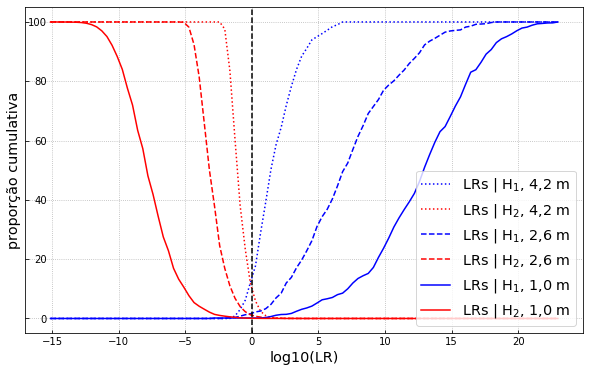

In [11]:
plt.plot(xplot, perc1_1, color='b',linestyle='dotted', label='LRs | $\mathregular{H_1}$, 4,2 m')
plt.plot(xplot, perc1_0, color='r',linestyle='dotted', label='LRs | $\mathregular{H_2}$, 4,2 m')

plt.plot(xplot, perc2_1, color='b',linestyle='dashed', label='LRs | $\mathregular{H_1}$, 2,6 m')
plt.plot(xplot, perc2_0, color='r',linestyle='dashed', label='LRs | $\mathregular{H_2}$, 2,6 m')

plt.plot(xplot, perc3_1, color='b', linestyle='solid',label='LRs | $\mathregular{H_1}$, 1,0 m')
plt.plot(xplot, perc3_0, color='r', linestyle='solid',label='LRs | $\mathregular{H_2}$, 1,0 m')

plt.axvline(x=0, color='k', linestyle='--')
plt.xlabel('log10(LR)',fontsize='x-large')
plt.ylabel('proporção cumulativa',fontsize='x-large')
plt.legend(fontsize='x-large', loc='lower right')
plt.grid(True, linestyle=':')
plt.tick_params(axis="y",direction="in", pad=-22)
plt.tick_params(axis="x",direction="in")
#ax.title("Tippett")